In [1]:
# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)

# Change the working directory to the parent directory
os.chdir(parent_directory)

from manager import Manager
import pandas as pd
import os
import numpy as np

In [2]:
manager = Manager(download_data=False)

In [3]:
# manager.cointegration()

In [4]:
pd.read_csv('./data/processed/coint.csv')

,Unnamed: 0,asset_1,asset_2,hedge_ratio,p_value,start,end,start_difference_candles,start_late_asset,missing_candles_inside
0,7,SOFI_1d,XOM_1d,0.521958,0.000145,2021-01-04 00:00:00,2023-05-15 00:00:00,3274,SOFI_1d_2021-01-04T00-00-00.csv,0
1,8,GOOGL_1d,MA_1d,0.769131,0.001936,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0
2,2,INTC_1d,MA_1d,0.785591,0.004064,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0
3,10,MA_1d,SPY_1d,0.822059,0.010051,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0
4,4,RIVN_1d,SHEL_1d,0.853817,0.011146,2021-11-10 00:00:00,2023-07-18 00:00:00,3490,RIVN_1d_2021-11-10T00-00-00.csv,0
5,6,SOFI_1d,SHEL_1d,0.588963,0.014282,2021-01-04 00:00:00,2023-05-15 00:00:00,3274,SOFI_1d_2021-01-04T00-00-00.csv,0
6,0,AMZN_1d,GOOGL_1d,0.942114,0.015263,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0
7,3,INTC_1d,QQQ_1d,0.754559,0.015353,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0
8,9,GOOGL_1d,SPY_1d,0.634337,0.023355,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0
9,1,INTC_1d,GOOGL_1d,1.022151,0.023792,2008-01-02 00:00:00,2020-10-06 00:00:00,0,NaN,0


In [15]:
# manager.visualize_cointegrated(pairs=6)

In [6]:
manager.preprocess_data("GOOGL", "MA", non_stationary_method='auto', check_non_stationary_after=True)

2023-12-17 23:37:02 - manager - INFO - non_stationary after removal: {}


Doing ('asset_2', 'TARGET')dy')')

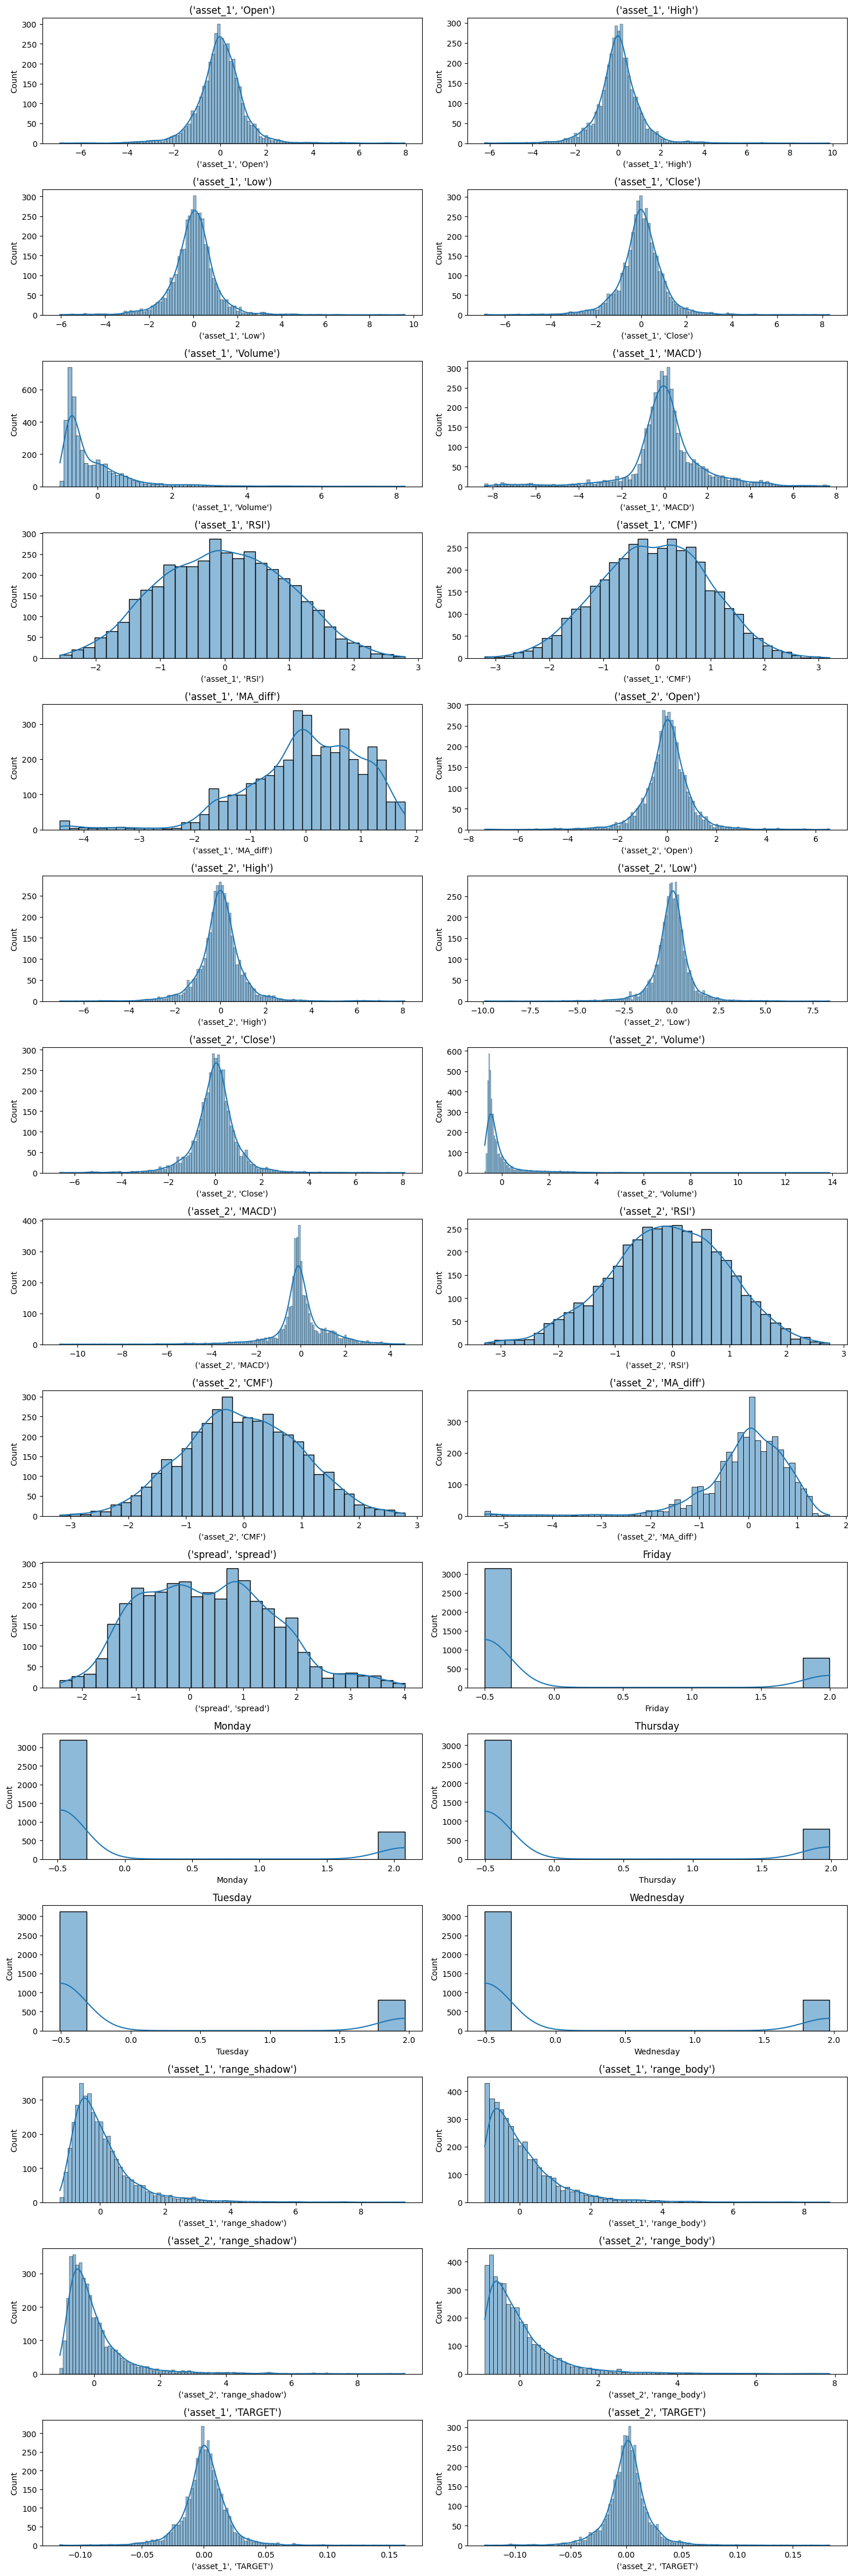

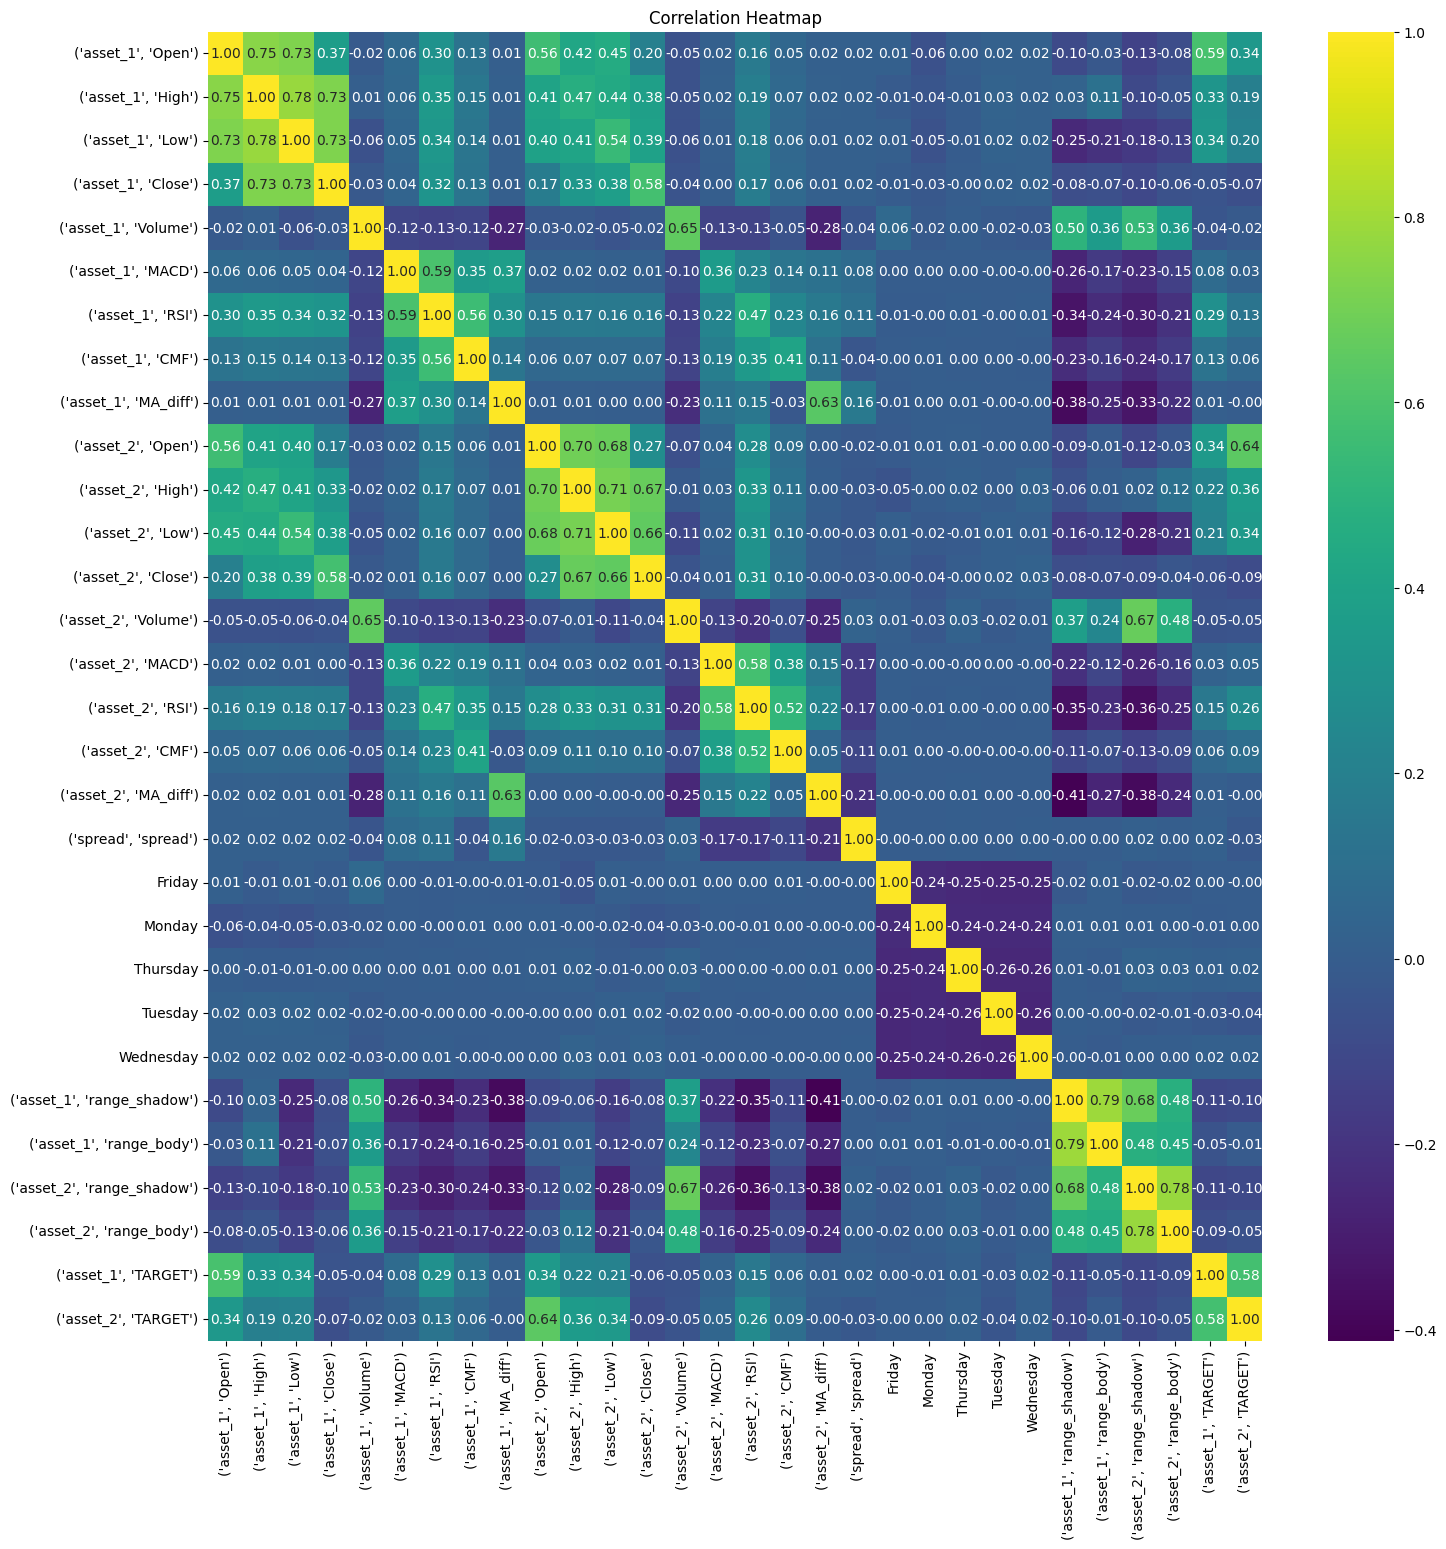

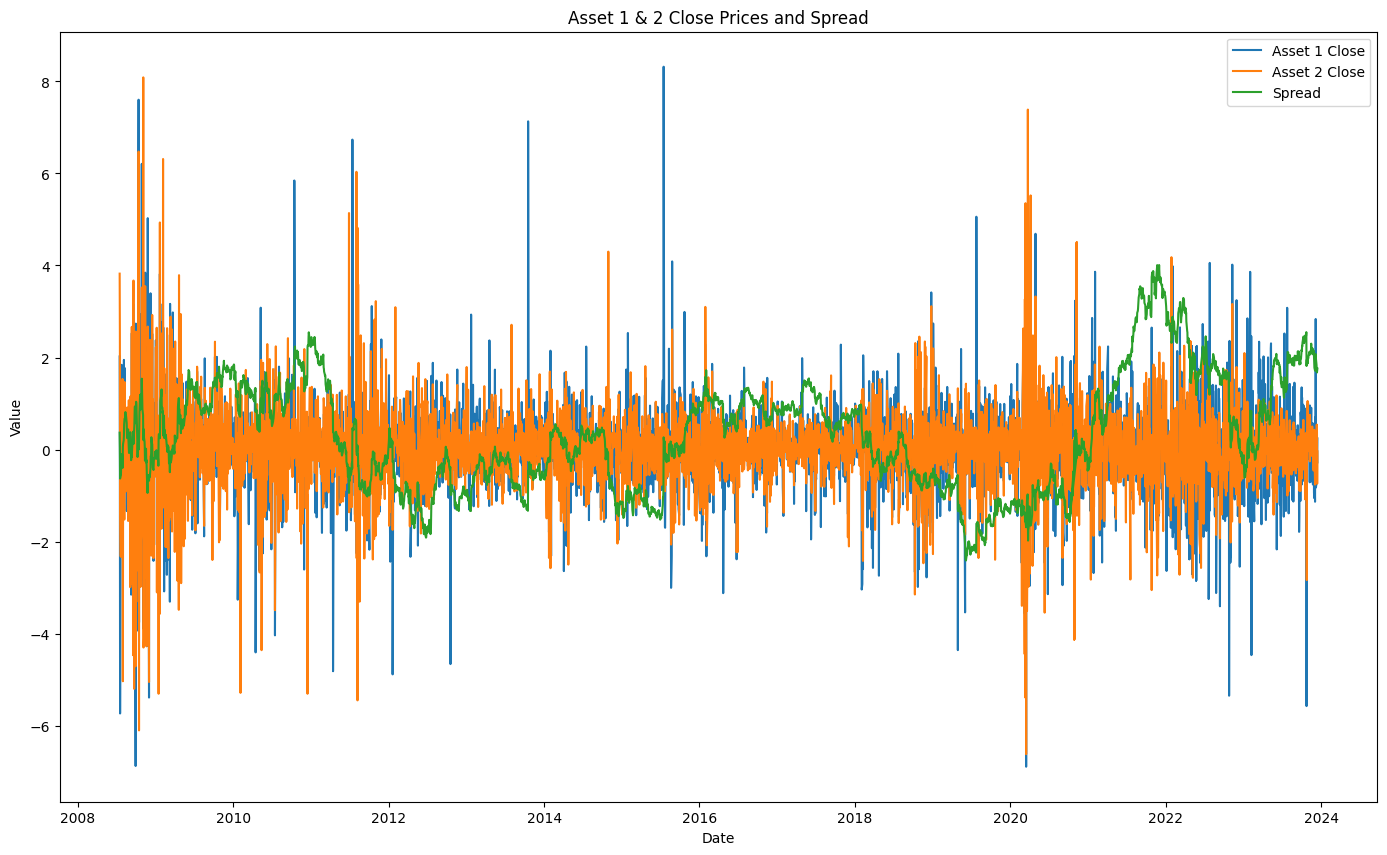

In [7]:
manager.visualize_preprocessed(save_imgs=False)

In [8]:
import yfinance as yf

In [9]:
df_1 = yf.download('GOOGL', start='2013-01-01')
df_2 = yf.download('MA', start='2013-01-01')

2023-12-17 23:37:14 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): query2.finance.yahoo.com:443
2023-12-17 23:37:14 - urllib3.connectionpool - DEBUG - https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/GOOGL?period1=1357016400&period2=1702852634&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None


[*********************100%***********************]  1 of 1 completed

2023-12-17 23:37:15 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): query2.finance.yahoo.com:443
2023-12-17 23:37:15 - urllib3.connectionpool - DEBUG - https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/MA?period1=1357016400&period2=1702852635&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None



[*********************100%***********************]  1 of 1 completed


In [10]:
df_1['returns'] = df_1['Close'] / df_1['Close'].shift(1) - 1
df_2['returns'] = df_2['Close'] / df_2['Close'].shift(1) - 1

In [11]:
df_1['returns'].mean(), df_1['returns'].std()

(0.0008707758104125861, 0.017268919361950893)

In [12]:
df_2['returns'].mean(), df_2['returns'].std()

(0.0009036568694530505, 0.016777612069305028)

In [13]:
(df_1['returns'].std() + df_2['returns'].std()) / 2

0.017023265715627962

In [14]:
(df_1['returns'].mean() + df_2['returns'].mean()) / 2

0.0008872163399328184